<a href="https://colab.research.google.com/github/Goldeno10/flexisaf_Internship_GenAI_DS_Intermediate/blob/main/Rice_type_Classification%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: goldeniIbrahim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 1.14GB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
# drop missing values
data_df.dropna(inplace=True)
data_df.drop('id', axis=1, inplace=True)
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.shape

(18185, 11)

In [ ]:
# unique values
print(data_df['Class'].unique())

print(data_df['Class'].value_counts())

[1 0]
Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import normalize
# Normalization
original_data = data_df.copy()

# implement the Z-Srore normalizarion
def z_score_normalization(df):
  # Extract the class column
  class_column = df.iloc[:, -1]
  print("Class column >> ", class_column.head())
  # Exclude the last 'class" in the nomalization
  features_df = df.iloc[:, : -1]
  mean = features_df.mean()
  std = features_df.std()

  # Handle columns with zero standard deviation to prevent NaN/Inf
  # If std is 0, all values are the same as the mean, so normalized value is 0.
  std_safe = std.replace(0, 1) # Replace 0 with 1 to avoid division by zero

  normalized_data_df = (features_df - mean) / std_safe
  normalized_data_df['Class'] = class_column
  return (normalized_data_df)


# Implement Min-Max Scaling Nomalization
def min_max_normalization(df):
  # Extract the class column
  class_column = df.iloc[:, -1]
  print("Class column >> ", class_column.head())
  # Exclude the last 'class" in the nomalization
  features_df = df.iloc[:, : -1]
  min_values = features_df.min()
  max_values = features_df.max()
  max_min_diff = max_values - min_values

  safe_min_max_diff = max_min_diff.replace(0, 1)

  normalized_data_df = (features_df - min_values) / safe_min_max_diff
  normalized_data_df['Class'] = class_column
  return (normalized_data_df)


# data_df = z_score_normalization(data_df)
data_df = min_max_normalization(data_df)

# for column in data_df.columns:
#   data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

Class column >>  0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1


In [ ]:
X = np.array(data_df.iloc[:, : -1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
print(X.shape)
print("=======================================")
print(X)
print("+++++++++++++++++++++++++++++++++++++++++")
print(Y.shape)
print("===========================================")
print(Y)

(18185, 10)
[[0.26209677 0.165901   0.61492191 ... 0.24420859 0.8079338  0.03237142]
 [0.04552549 0.00512262 0.35293423 ... 0.03628297 0.89989824 0.03720397]
 [0.06841831 0.01980274 0.36629163 ... 0.04172445 0.95026456 0.04222159]
 ...
 [0.49986993 0.73932171 0.38425128 ... 0.4662596  0.69607063 0.61372026]
 [0.44719043 0.7083425  0.35447441 ... 0.46984873 0.63087258 0.61991531]
 [0.4698231  0.72378147 0.35688412 ... 0.45457406 0.68161115 0.63010796]]
+++++++++++++++++++++++++++++++++++++++++
(18185,)
[1 1 1 ... 0 0 0]


In [ ]:
# Split data into training, test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [ ]:
Y_train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Create a Dataset
class RiceDataset(Dataset):
  """Custom Dataset for Rice Classification"""
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

  def __len__(self):
    return len(self.X)


In [ ]:
# Create the datasets
training_data = RiceDataset(X_train, Y_train)
test_data = RiceDataset(X_test, Y_test)
val_data = RiceDataset(X_val, Y_val)

In [ ]:
# create the dataloader
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=True)

In [ ]:
for x, y in train_dataloader:
  print(x)
  print("=========================")
  print(y)
  break

tensor([[0.9056, 0.8211, 0.8341, 0.7362, 0.8470, 0.9280, 0.5853, 0.6233, 0.8276,
         0.3279],
        [0.8716, 0.7818, 0.8323, 0.7152, 0.8148, 0.9015, 0.7259, 0.6184, 0.8063,
         0.3063],
        [0.4471, 0.7099, 0.3397, 0.9155, 0.4143, 0.5307, 0.7966, 0.4513, 0.6608,
         0.6373],
        [0.5212, 0.6856, 0.4590, 0.8567, 0.4875, 0.6017, 0.3033, 0.4781, 0.6998,
         0.5002],
        [0.6469, 0.6666, 0.6506, 0.7499, 0.6004, 0.7153, 0.4137, 0.4796, 0.8358,
         0.3430],
        [0.4878, 0.5216, 0.5660, 0.7091, 0.4501, 0.5701, 0.4133, 0.3700, 0.8678,
         0.3004],
        [0.3210, 0.6992, 0.1768, 0.9712, 0.2966, 0.4018, 0.0731, 0.4120, 0.5721,
         0.8404],
        [0.2246, 0.4972, 0.1769, 0.9161, 0.2100, 0.2944, 0.8212, 0.2866, 0.6532,
         0.6393],
        [0.4338, 0.6563, 0.3650, 0.8878, 0.4038, 0.5177, 0.6717, 0.4170, 0.7041,
         0.5660],
        [0.7436, 0.7183, 0.7311, 0.7344, 0.6937, 0.7978, 0.3850, 0.5327, 0.8373,
         0.3260],
        [0

In [ ]:
# Build the model
class RiceModel(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_layers):
    super().__init__()
    self.layer1 = nn.Linear(input_shape, hidden_layers)
    self.layer2 = nn.Linear(hidden_layers, hidden_layers)
    self.layer3 = nn.Linear(hidden_layers, output_shape)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.layer3(self.layer2(self.layer1(x))))

model = RiceModel(input_shape=X.shape[1], output_shape=1, hidden_layers=128).to(device)

In [ ]:
X.shape, Y.shape

((18185, 10), (18185,))

In [ ]:
# Sumary of model
summary(model, (1, X.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]           1,408
            Linear-2               [-1, 1, 128]          16,512
            Linear-3                 [-1, 1, 1]             129
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [ ]:
# create loss function snd optimizer
loss_fn = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
total_train_loss_plot = []
total_val_loss_plot = []
total_train_acc_plot = []
total_val_acc_plot = []

EPOCH = 10

for epoch in range(EPOCH):
  train_loss = 0
  val_loss = 0
  train_acc = 0
  val_acc = 0

  model.train()
  for batch, (x, y) in enumerate(train_dataloader):
    y_pred = model(x).squeeze(1)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_score(
        y.cpu().detach().numpy(),
        y_pred.cpu().detach().numpy().round()
      )

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Test/validation
  with torch.inference_mode():
    model.eval()
    for batch, (x, y) in enumerate(test_dataloader):
      y_pred = model(x).squeeze(1)
      loss = loss_fn(y_pred, y)
      val_loss += loss
      val_acc += accuracy_score(
          y.cpu().detach().numpy(),
          y_pred.cpu().detach().numpy().round()
        )

  total_train_loss_plot.append(train_loss / len(train_dataloader))
  total_val_loss_plot.append(val_loss / len(test_dataloader))
  total_train_acc_plot.append(train_acc / len(train_dataloader))
  total_val_acc_plot.append(val_acc / len(test_dataloader))

  print(
      f"Epoch: {epoch+1} | Train Loss: {train_loss / len(train_dataloader):.4f} | Val Loss: {val_loss / len(test_dataloader):.4f} | Train Acc: {train_acc / len(train_dataloader):.4f} | Val Acc: {val_acc / len(test_dataloader):.4f}"
  )

  print("="*32)




Epoch: 1 | Train Loss: 0.0877 | Val Loss: 0.0289 | Train Acc: 0.9750 | Val Acc: 0.9895
Epoch: 2 | Train Loss: 0.0455 | Val Loss: 0.0280 | Train Acc: 0.9843 | Val Acc: 0.9895
Epoch: 3 | Train Loss: 0.0444 | Val Loss: 0.0281 | Train Acc: 0.9853 | Val Acc: 0.9902
Epoch: 4 | Train Loss: 0.0435 | Val Loss: 0.0280 | Train Acc: 0.9859 | Val Acc: 0.9895
Epoch: 5 | Train Loss: 0.0439 | Val Loss: 0.0286 | Train Acc: 0.9851 | Val Acc: 0.9909
Epoch: 6 | Train Loss: 0.0435 | Val Loss: 0.0280 | Train Acc: 0.9855 | Val Acc: 0.9895
Epoch: 7 | Train Loss: 0.0418 | Val Loss: 0.0272 | Train Acc: 0.9863 | Val Acc: 0.9906
Epoch: 8 | Train Loss: 0.0421 | Val Loss: 0.0310 | Train Acc: 0.9861 | Val Acc: 0.9895
Epoch: 9 | Train Loss: 0.0412 | Val Loss: 0.0272 | Train Acc: 0.9866 | Val Acc: 0.9898
Epoch: 10 | Train Loss: 0.0405 | Val Loss: 0.0317 | Train Acc: 0.9866 | Val Acc: 0.9887


In [ ]:
total_train_loss_plot

[tensor(0.0877, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0455, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0444, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0435, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0439, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0435, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0418, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0421, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0412, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0405, device='cuda:0', grad_fn=<DivBackward0>)]

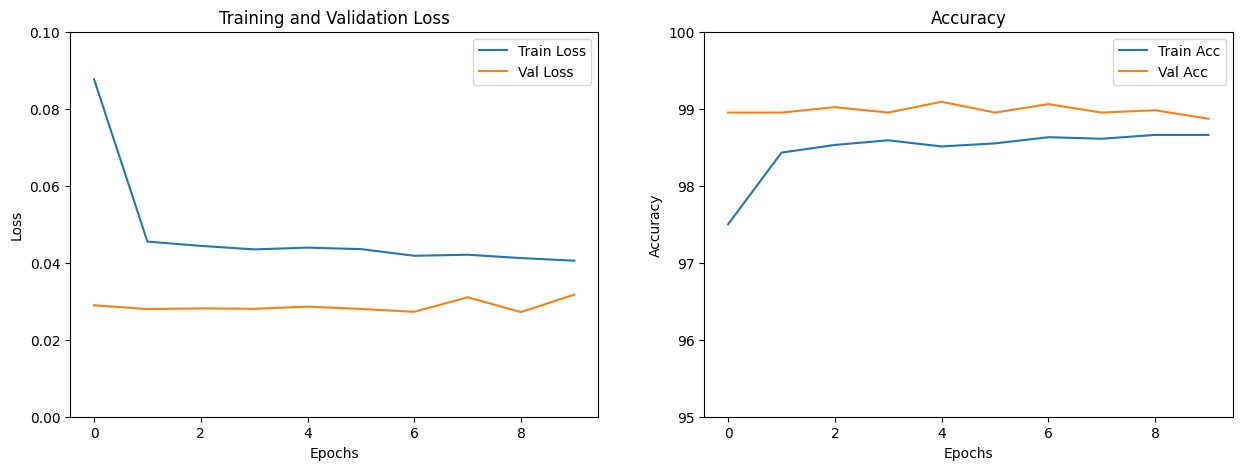

In [ ]:
# plot results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# --- Loss Plot Lines (Already Fixed) ---
# Ensure these still use .detach().to("cpu") if they contain PyTorch Tensors
ax[0].plot([item.detach().to("cpu") for item in total_train_loss_plot], label="Train Loss")
ax[0].plot([item.detach().to("cpu") for item in total_val_loss_plot], label="Val Loss")
ax[0].legend()
ax[0].set_title("Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_ylim(0, .1)

# --- Accuracy Plot Lines (FIXED) ---
# Replaced the .round(4) method with the round(item, 4) function.
ax[1].plot([round(item, 4)*100 for item in total_train_acc_plot], label="Train Acc")
ax[1].plot([round(item, 4)*100 for item in total_val_acc_plot], label="Val Acc")
# ------------------------------------

ax[1].legend()
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim(95, 100) # Changed ylim to 100 since you are multiplying by 100
# NOTE: Since you are multiplying by 100, the maximum possible value is 100.
# You might want to adjust the y-axis limit accordingly.

plt.show()

In [ ]:
area = 6284

original_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:

fields = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']


# Implement nomalization for inference data
def z_score_normalization(data: list):
  for i in range(len(data)):
    data[i] = (data[i] - original_data[fields[i]].mean()) / original_data[fields[i]].std()

    return data


def min_max_normalization(data: list):
  for i in range(len(data)):
    data[i] = (data[i] - original_data[fields[i]].min()) / (original_data[fields[i]].max() - original_data[fields[i]].min())

  return data

def convert_to_tensor(data: list):
  data = torch.tensor(data, dtype=torch.float32).to(device)
  return data


Area = 1954
MajorAxisLength = 50
MinorAxisLength = 54
Eccentricity = 0.7
ConvexArea = 12
EquivDiameter = 33
Extent = 0.92
Perimeter = 405
Roundness = 0.76
AspectRation = 1.54

test_data = [Area, MajorAxisLength, MinorAxisLength,
             Eccentricity, ConvexArea, EquivDiameter,
             Extent, Perimeter, Roundness, AspectRation
            ]

tensor_data = convert_to_tensor(min_max_normalization(test_data))
tensor_data




# Area = 2954/original_data["Area"].abs().max()
# MajorAxisLength = 81/original_data['MajorAxisLength'].abs().max()
# MinorAxisLength = 54/original_data['MinorAxisLength'].abs().max()
# Eccentricity = 0.9/original_data['Eccentricity'].abs().max()
# ConvexArea = 12/original_data['ConvexArea'].abs().max()
# EquivDiameter = 33/original_data['EquivDiameter'].abs().max()
# Extent = 98/original_data['Extent'].abs().max()
# Perimeter = 305/original_data['Perimeter'].abs().max()
# Roundness = 0.76/original_data['Roundness'].abs().max()
# AspectRation = 1.54/original_data['AspectRation'].abs().max()

tensor([-0.0739, -0.2212,  0.4069,  0.0805, -0.3045, -0.4127,  1.0664,  0.6677,
         0.8018,  0.0712], device='cuda:0')

In [ ]:
prediction = model(tensor_data)
round(prediction.item())

1

In [ ]:
round(0.5)

0